# Линейная регрессия для анализа данных

## Задание 1. Первичный анализ данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

### 1. Посстроим гистограммы для визуальной оценки данных 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
Height    25000 non-null float64
Weight    25000 non-null float64
dtypes: float64(2)
memory usage: 585.9 KB
None
         Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971


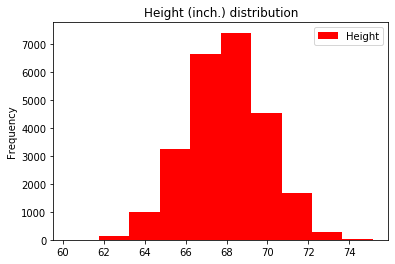

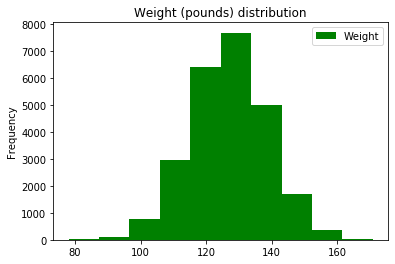

In [2]:
data=pd.read_csv("Linear_Regression_(part1)_(weights_heights).csv", index_col='Index')
print (data.info())
print (data.head())

data.plot(y='Height', kind='hist', color='red', title='Height (inch.) distribution')
data.plot(y='Weight', kind='hist', color='green', title='Weight (pounds) distribution')

### 2. Добавим признак Индекс массы тела (BMI). Отобразим попарные зависимости признаков

         Height    Weight        BMI
Index                               
1      65.78331  112.9925  18.355808
2      71.51521  136.4873  18.760773
3      69.39874  153.0269  22.336747
4      68.21660  142.3354  21.502458
5      67.78781  144.2971  22.075458


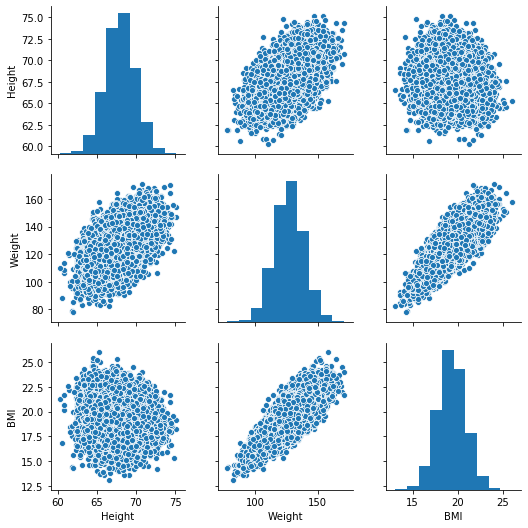

In [3]:
data['BMI']=data['Weight']/((data['Height'])**2)*703
print (data.head())
sns.pairplot(data)

### 3. Построим boxplot (зависимость какого-то количественного признака от категориального), демонстрирующий зависимость роста от весовой категории

         Height    Weight        BMI  Weight_category
Index                                                
1      65.78331  112.9925  18.355808                1
2      71.51521  136.4873  18.760773                2
3      69.39874  153.0269  22.336747                3
4      68.21660  142.3354  21.502458                2
5      67.78781  144.2971  22.075458                2
AxesSubplot(0.125,0.125;0.775x0.755)


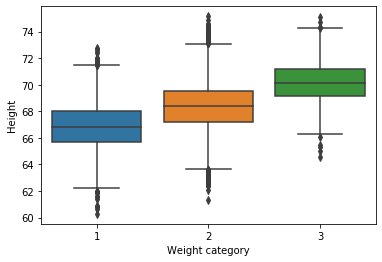

In [4]:
Weight_category=[]
for elem in data['Weight']:
    if elem < 120:
        Weight_category.append(1)
    elif elem >=150:
        Weight_category.append(3)
    else:
        Weight_category.append(2)
data['Weight_category']=Weight_category      
print (data.head())
Weight_category_and_Height=sns.boxplot(data=data, x='Weight_category', y='Height')
Weight_category_and_Height.set(xlabel = 'Weight category')
print (Weight_category_and_Height)

### 4. Построим scatter plot зависимости роста от веса

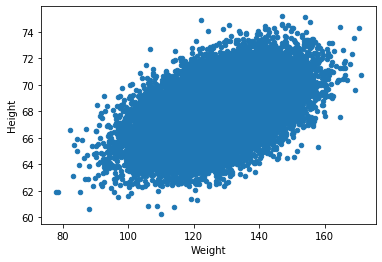

In [5]:
data.plot(kind='scatter', x='Weight', y='Height')

## Задание 2. Минимизация квадратичной ошибки 
Задача восстановления регрессии решается минимизацией квадратичной функции ошибки: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал

### 1. Напишем функцию, которая по двум параметрам w_0 и w_1 вычисляет квадратичную ошибку приближения 

In [6]:
def get_y(w0, w1,x):
    return(w0+w1*x)
def get_error(w0,w1):
    return (sum(map(lambda x, y: (y-get_y(w0, w1,x))**2, data['Weight'], data['Height'])))

### 2. Отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса

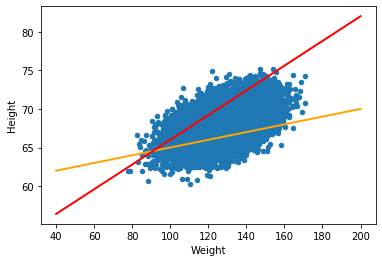

In [7]:
def make_model_plot(w_values):
    data.plot(kind='scatter', x='Weight', y='Height')
    x_range=np.linspace(40,200,100)
    colors=['red', 'orange']
    for w0, w1 in w_values:
        y=list(map(lambda x: get_y(w0, w1,x), x_range))
        color = colors.pop()
        plt.plot(x_range, y,color=color, lw=2)
make_model_plot([(60, 0.05), (50, 0.16)])

### 3. Найдем минимум функционала для w0=50, w1 в диапазоне [-5;5]. Построим на графике зависимости рост-вес прямую, с параметрами w0 и полученное оптимальное значение w1

w1_opt: 0.14109203728833175


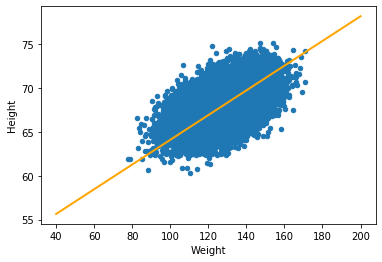

In [8]:
w0=50
w1_opt=optimize.minimize_scalar(lambda x: get_error(w0,x), [-5,5]).x
print ('w1_opt:' ,w1_opt)
make_model_plot([(w0, w1_opt)])

### 4. Найдем минимум функции для w0 в диапазоне [-100,100]  и для w1 в диапазоне [-5;5] с помощью метода оптимизации L-BFGS-B. Начальная точка – (w0, w1) = (0, 0)

w0_opt: 57.57171454428976 
 w1_opt: 0.0820069703119935


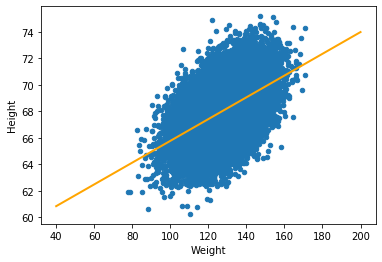

In [9]:
def get_error_opt(w):
    return get_error(w[0], w[1])

w0_opt, w1_opt = optimize.minimize(get_error_opt, (0,0), bounds = [(-100, 100), (-5, 5)], method = 'L-BFGS-B').x
print ('w0_opt:', w0_opt, '\n', 'w1_opt:', w1_opt)
make_model_plot([(w0_opt, w1_opt)])